In [2]:
import cv2 as cv
def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """
    
    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape
    
    rotation_mat = cv.getRotationMatrix2D(image_center, angle, 1.)
    
    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])
    
    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)
    
    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]
    
    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat

img shape: (403, 4728)
minima found: (35, 545) with value of 0.19581188261508942
img shape: (413, 4560)
minima found: (46, 358) with value of 0.1318957358598709
img shape: (418, 4371)
minima found: (66, 171) with value of 0.27128827571868896
img shape: (407, 4398)
minima found: (84, 327) with value of 0.3320537805557251
img shape: (413, 4439)
minima found: (147, 490) with value of 0.18401113152503967
img shape: (419, 4327)
minima found: (206, 519) with value of 0.5330833792686462
img shape: (414, 4652)
minima found: (80, 549) with value of 0.6080178618431091
img shape: (405, 4390)
minima found: (305, 940) with value of 0.3686227798461914


[(35, 545),
 (46, 358),
 (66, 171),
 (84, 327),
 (147, 490),
 (206, 519),
 (80, 549),
 (305, 940)]

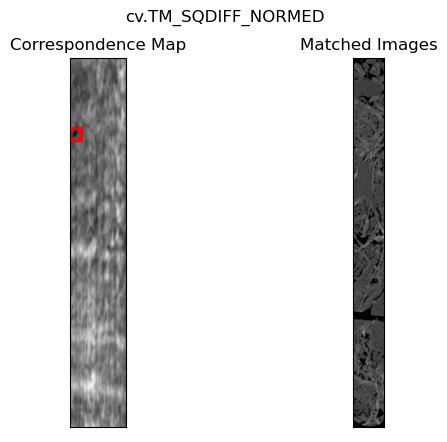

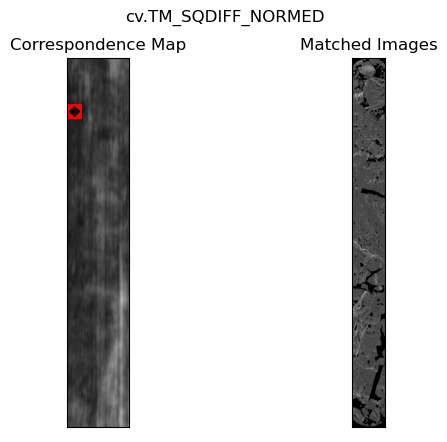

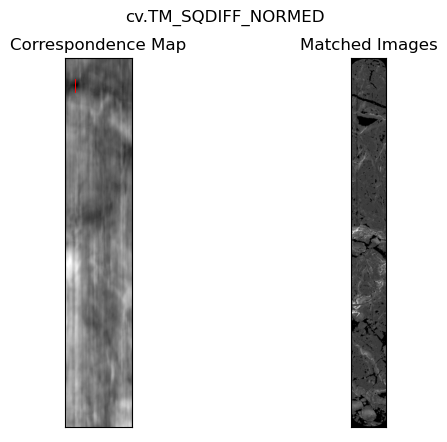

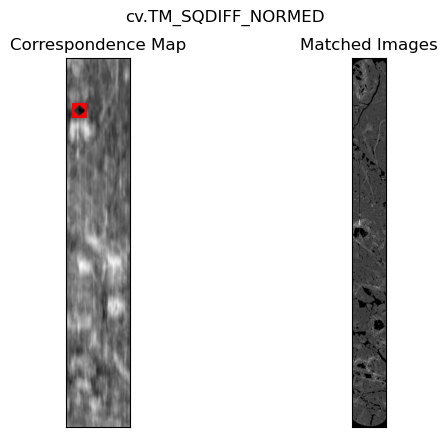

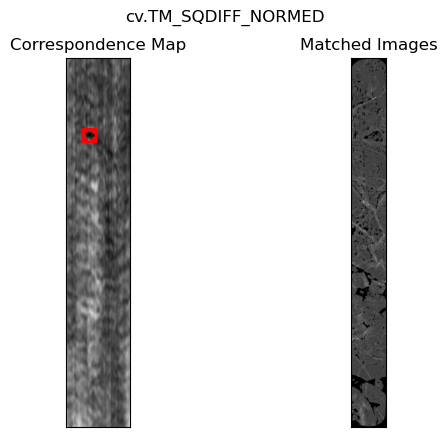

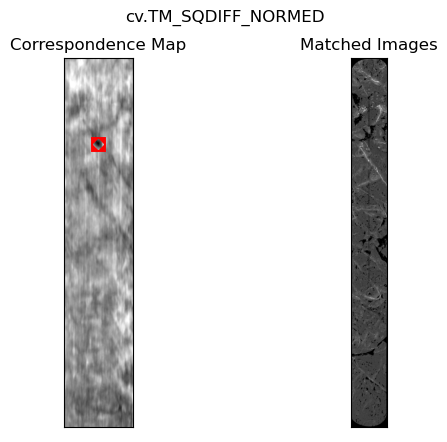

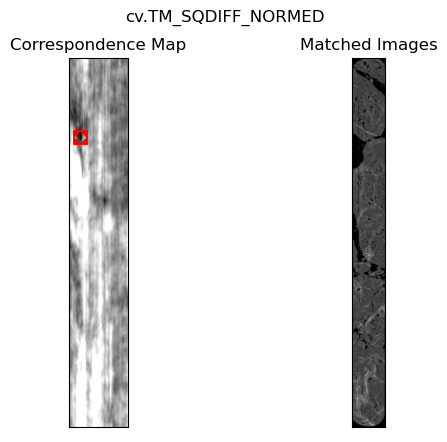

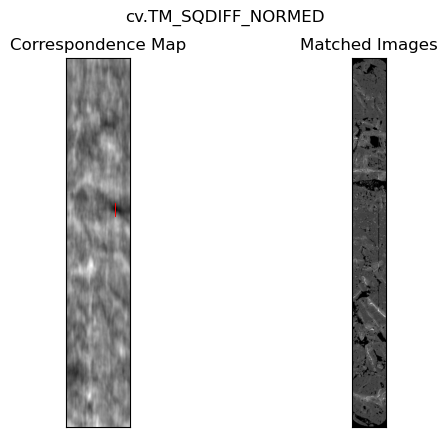

In [3]:
#This script matches jpgs from the atl_jpg and chirop_jpg folders.
#The width of the chiroptera lidar is about 490 meters.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

min_loc_val = []
for i in range(0,8):
    b1 = i * 4
    b2 = b1 + 4

    #TODO: Fix file paths
    chirop_path = f'../make_image/output_chirop/chirop_{b1}_{b2}.jpg'
    img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)
    cw, ch = img.shape[::-1]
    print(f'img shape: ({cw}, {ch})')
    atl_path = f'../make_image/output_atl/atl_{b1}_{b2}.jpg'

    template = cv.imread(atl_path, cv.IMREAD_GRAYSCALE)
    w, h = template.shape[::-1]
    img2 = img.copy()

    meth = 'cv.TM_SQDIFF_NORMED'

    img = img2.copy()
    method = eval(meth)

    # Apply Template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    (x_min, y_min) = min_loc

    top_left = (x_min -1, y_min - 1)
    bottom_right = (top_left[0] + w + 1, top_left[1] + h + 1)
    img[y_min:y_min+h, x_min:x_min+w] = template

    start_point = (100,100)
    end_point = (200, 200)
    fig = plt.figure()
    plt.subplot(121)
    plt.subplot(121).add_patch(Rectangle(min_loc, 5, 5, fc ='none',  ec ='r', lw = 10) ) 
    plt.imshow(res,cmap = 'gray')
    plt.title('Correspondence Map'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Matched Images'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth
                 )
    fig.savefig(f'match_{b1}_{b2}.png')
    # plt.show()
    # plt.imshow(img,cmap = 'gray')
    # # plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    # # plt.suptitle(meth)
    #     # plt.title(f'Best CCOEFF_NORM score for rotations')
    #     # plt.show()
    print(f'minima found: {min_loc} with value of {min_val}')
    im3 = Image.fromarray(img)
    im3 = im3.convert("L")
    im3.save(f'matched_{b1}_{b2}.jpg')
    min_loc_val.append(min_loc)

#This output is the offset from the origin of the chiroptera image. 
min_loc_val

In [75]:
rot_crops = [[17.88, 1328, 1731],
 [17.7, 1268, 1681],
 [17.52, 1187, 1605],
 [17.34, 1201, 1608],
 [17.16, 1202, 1615],
 [16.98, 1156, 1575],
 [16.8, 1239, 1653],
 [16.62, 1156, 1561]]


import math

In [115]:
a = -17.88
min_loc_val = np.array(min_loc_val)
#each pair is meters from top left of chiroptera df in (-x, -y) form.
#Let's deal with 0m_4m first.
# chirop_path = f'../make_image/chirop 1C rotated/chirop_0_4.jpg'
# img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)
# img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
# img[35:38, 28:31,:] = [255,0,0]
# print(img.shape)
# img = np.pad(img, ((0,0),(1328, 1731),(0,0)), mode='constant')
# # print(img.shape)
# # img = rotate_image(img, a)
# # print(img.shape)
# # im3 = Image.fromarray(img)
# # im3.save(f'unrotated/0_4.jpg')

# unr_img = rotate_image(img, -17.88)
# im3 = Image.fromarray(unr_img)
# im3.save(f'unrotated/0_4.jpg')

uncropped_min_val = (35, 28)
unr_unc_min_val = rotate((0, 0), uncropped_min_val, np.deg2rad(a))

print(unr_unc_min_val)
# fig = plt.figure() 

# ax = fig.add_subplot(111) 

# ax.imshow(img,cmap = 'gray')
# ax.plot(35, 28, 'ro')
# plt.show()

(41.90624121527114, 15.901790691853272)


In [90]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


l = []

for i in range(0,8):
    b1 = i * 4
    b2 = b1 + 4

    atl_path = f'../make_image/atl_jpg_norm_resized/atl_{b1}_{b2}.jpg'
    chirop_path = f'../make_image/chirop_jpg_norm_resized/chirop_{b1}_{b2}.jpg'

    img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    img2 = img.copy()
    template = cv.imread(atl_path, cv.IMREAD_GRAYSCALE)
    assert template is not None, "file could not be read, check with os.path.exists()"
    w, h = template.shape[::-1]
    
    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
     'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    
    meth = 'cv.TM_CCORR'
    method = eval(meth)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    # Apply template Matching
    #print(img.shape)
    #print(template.shape)
    res = cv.matchTemplate(img,template,eval(meth))
    #print(res.shape)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    # plt.subplot(121),plt.imshow(res,cmap = 'gray')
    # plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # plt.subplot(122),plt.imshow(img,cmap = 'gray')
    # plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    # plt.suptitle(meth)
    l.append(top_left)

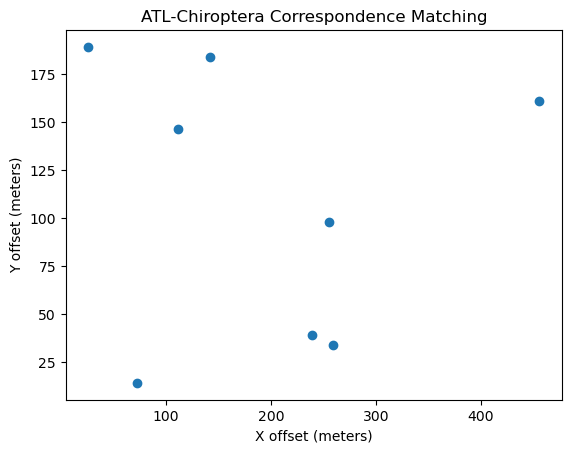

In [91]:
l = np.array(l)
x = l[:,0]
y = l[:,1]

plt.title('ATL-Chiroptera Correspondence Matching')
plt.xlabel('X offset (meters)')
plt.ylabel('Y offset (meters)')
plt.scatter(x,y)
plt.show()